<a href="https://colab.research.google.com/github/HyeongJun02/STUDY-MachineLearning/blob/main/%5BML%5D_%5B24_11_05%5D_CNN_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 패키지 선언

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader

## ------------------------- Convolution layer 실습 -------------------------

*   Convolution layer --> nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
*   layer = [3 x 3 x 1] x 1, s1, p0




In [ ]:
# 테스트 입력 텐서 생성
test_tensor = torch.rand(1, 1, 5, 5) # Batch size, Channel, Height, Width
print(test_tensor.size())
print(test_tensor)

torch.Size([1, 1, 5, 5])
tensor([[[[0.2795, 0.3491, 0.1132, 0.4398, 0.8590],
          [0.5951, 0.1469, 0.7789, 0.2718, 0.3717],
          [0.9062, 0.0820, 0.6092, 0.1358, 0.9667],
          [0.0110, 0.8412, 0.1882, 0.1073, 0.5206],
          [0.7959, 0.7258, 0.5337, 0.3573, 0.3461]]]])


In [ ]:
class testModel_channel1 (nn.Module):
  def __init__(self):
    super(testModel_channel1, self).__init__()

    self.conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0)

  def forward(self, x):

    # run code
    y = self.conv(x)

    return y

In [ ]:
model = testModel_channel1()
out = model(test_tensor)
print(out.size())
print(out)

torch.Size([1, 1, 3, 3])
tensor([[[[-0.3424, -0.1388, -0.4072],
          [-0.6250, -0.2427, -0.3573],
          [-0.4912, -0.4979, -0.5087]]]], grad_fn=<ConvolutionBackward0>)


*   layer = [5 x 5 x 6] x 16, s1, p0

In [ ]:
test_tensor = torch.rand(1, 6, 32, 32)

In [ ]:
class testModel_channel6 (nn.Module):
  def __init__(self):
    super(testModel_channel6, self).__init__()

    self.conv = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)

  def forward(self, x):

    # run code
    y = self.conv(x)

    return y

In [ ]:
model = testModel_channel6()
out = model(test_tensor)
print(out.size())

torch.Size([1, 16, 28, 28])


### 3 Convolution layer
*   layer 1: [3 x 3 x 1] x 32, s1, p1
*   layer 2: [3 x 3 x 32] x 64, s1, p1
*   layer 3: [3 x 3 x 64] x 128, s1, p1

In [ ]:
test_tensor = torch.rand(1, 1, 32, 32)

In [ ]:
class testModel_layer3 (nn.Module):
  def __init__(self):
    super(testModel_layer3, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

  def forward(self, x):

    # run code
    y = self.conv1(x)
    y = self.conv2(y)
    y = self.conv3(y)

    return y

In [ ]:
model = testModel_layer3()
out = model(test_tensor)
print(out.size())

torch.Size([1, 128, 32, 32])


## ------------------------- LeNet 실습 -------------------------

## Dataset 선언

In [ ]:
# Training dataset 다운로드
cifar10_train = dataset.CIFAR10(root = "./", # 데이터셋을 저장할 위치
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
cifar10_test = dataset.CIFAR10(root = "./",
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

100%|██████████| 170M/170M [00:04<00:00, 41.3MB/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


## CIFAR10 데이터셋 형상 확인

50000
torch.Size([3, 32, 32])
9


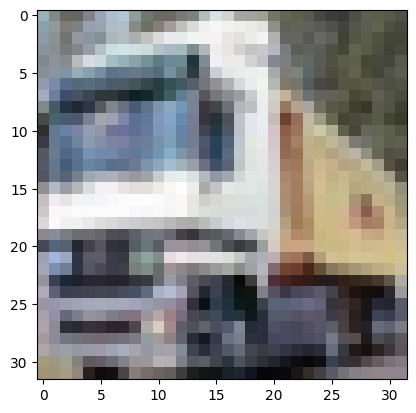

In [ ]:
from matplotlib import pyplot as plt
print(len(cifar10_train))     # training dataset 개수 확인

first_data = cifar10_train[1]
print(first_data[0].shape)  # 두번째 data의 형상 확인
print(first_data[1])        # 두번째 data의 정답 확인


plt.imshow(first_data[0].permute(1, 2, 0))
plt.show()

## 비교용 MLP 모델 정의

In [ ]:
class TestMLP (nn.Module):
  def __init__ (self):
    super(TestMLP, self).__init__()

    # self.fc1 = nn.Linear(3072, 1024)
    self.fc1 = nn.Linear(3*32*32, 1024)
    self.fc2 = nn.Linear(1024, 10)
    self.sigmoid = nn.Sigmoid()


  def forward(self, x):
    x = x.reshape(-1, 3072)
    y = self.sigmoid(self.fc1(x))
    y = self.fc2(y)

    return y

## Training

In [ ]:
batch_size = 100
learning_rate = 0.1
training_epochs = 30
loss_function = nn.CrossEntropyLoss()
network = TestMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)
data_loader = DataLoader(dataset=cifar10_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda:0'

network = network.to(device)
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:

    img = img.to(device)
    label = label.to(device)

    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 2.073821
Epoch: 2 Loss = 1.879054
Epoch: 3 Loss = 1.823221
Epoch: 4 Loss = 1.784418
Epoch: 5 Loss = 1.742712
Epoch: 6 Loss = 1.707418
Epoch: 7 Loss = 1.674510
Epoch: 8 Loss = 1.646480
Epoch: 9 Loss = 1.620029
Epoch: 10 Loss = 1.600944
Epoch: 11 Loss = 1.579939
Epoch: 12 Loss = 1.558253
Epoch: 13 Loss = 1.537746
Epoch: 14 Loss = 1.525468
Epoch: 15 Loss = 1.506970
Epoch: 16 Loss = 1.497290
Epoch: 17 Loss = 1.478739
Epoch: 18 Loss = 1.467434
Epoch: 19 Loss = 1.454694
Epoch: 20 Loss = 1.440047
Epoch: 21 Loss = 1.430228
Epoch: 22 Loss = 1.415485
Epoch: 23 Loss = 1.403751
Epoch: 24 Loss = 1.393127
Epoch: 25 Loss = 1.382593
Epoch: 26 Loss = 1.374307
Epoch: 27 Loss = 1.359754
Epoch: 28 Loss = 1.350632
Epoch: 29 Loss = 1.342448
Epoch: 30 Loss = 1.331566
Learning finished


## 성능 확인

In [ ]:
network = network.to('cpu')
with torch.no_grad(): # test에서는 기울기 계산 제외

  img_test = torch.tensor(np.transpose(cifar10_test.data, (0, 3, 1, 2)))/255.
  label_test = torch.tensor(cifar10_test.targets)

  prediction = network(img_test) # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.5001000165939331


## LeNet 모델 정의


*   Convolution layer --> nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
*   Fully connected layer --> nn.Linear(in_features, out_features)
*   Activation function (ReLU) --> nn.ReLU()
*   Max pooling layer --> nn.MaxPool2d(kernel_size, stirde)
*   Avg pooling layer --> nn.AvgPool2d(kernel_size, stride)



In [ ]:
class LeNet (nn.Module):
  def __init__ (self):
    super(LeNet, self).__init__()

    '''
    # relu
    self.relu = nn.ReLU()

    # pool
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    # cnn func
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=1, padding=0)
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=16, kernel_size=5, stride=1, padding=0)

    # mlp func
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    '''

    # nn.Sequential - 함수들을 묶어서 그룹화
    self.convolution_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(in_channels=64, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )

    self.fully_layer(
        nn.Linear(5*5*16, 120),
        nn.ReLU(),

        nn.Linear(120, 84),
        nn.ReLU(),

        nn.Linear(84, 10),
    )

  def forward(self, x):
    '''
    # cnn code
    y = self.conv1(x)
    y = self.relu(y)
    y = self.pool(y)
    y = self.conv2(y)
    y = self.relu(y)
    y = self.pool(y)
    '''
    y = self.convolution_layer(x)

    # 평탄화
    y = y.reshape(-1, 5*5*16)

    '''
    # mlp code
    y = self.fc1(y)
    y = self.relu(y)
    y = self.fc2(y)
    y = self.relu(y)
    y = self.fc3(y)
    '''
    y = self.fully_layer(y)

    return y

## Hyper-parameters 지정

In [ ]:
batch_size = 100
learning_rate = 0.1
training_epochs = 30
loss_function = nn.CrossEntropyLoss()
network = LeNet()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)
data_loader = DataLoader(dataset=cifar10_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## Perceptron 학습을 위한 반복문 선언

In [ ]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda:0'

network = network.to(device)
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:

    img = img.to(device)
    label = label.to(device)

    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 2.098472
Epoch: 2 Loss = 1.711049
Epoch: 3 Loss = 1.513649
Epoch: 4 Loss = 1.383399
Epoch: 5 Loss = 1.290959
Epoch: 6 Loss = 1.212080
Epoch: 7 Loss = 1.146213
Epoch: 8 Loss = 1.091796
Epoch: 9 Loss = 1.035632
Epoch: 10 Loss = 0.985102
Epoch: 11 Loss = 0.941273
Epoch: 12 Loss = 0.901970
Epoch: 13 Loss = 0.860860
Epoch: 14 Loss = 0.827841
Epoch: 15 Loss = 0.796113
Epoch: 16 Loss = 0.763656
Epoch: 17 Loss = 0.738531
Epoch: 18 Loss = 0.712672
Epoch: 19 Loss = 0.691989
Epoch: 20 Loss = 0.661195
Epoch: 21 Loss = 0.639491
Epoch: 22 Loss = 0.620370
Epoch: 23 Loss = 0.597714
Epoch: 24 Loss = 0.589503
Epoch: 25 Loss = 0.555547
Epoch: 26 Loss = 0.551529
Epoch: 27 Loss = 0.521921
Epoch: 28 Loss = 0.513975
Epoch: 29 Loss = 0.490075
Epoch: 30 Loss = 0.479188
Learning finished


## 학습이 완료된 모델을 이용해 정답률 확인

In [ ]:
network = network.to('cpu')
with torch.no_grad(): # test에서는 기울기 계산 제외

  img_test = torch.tensor(np.transpose(cifar10_test.data, (0, 3, 1, 2)))/255.
  label_test = torch.tensor(cifar10_test.targets)

  prediction = network(img_test) # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.6428999900817871
